Author: Eli Miranda

Date: 05/13/2024

Email: mr.miranda93@yahoo.com 

Auto Insurance Retention Capstone

__________________________________________________________________________________________________________________________________________

Requirements: Please submit your Jupyter notebook which should include commented code and markdown cells explaining your methodology and findings.

## Table of Contents

[1. - Introduction](#part-1)

Introduction

[2. - Key Question(s)](#part-2)

Key Question(s)

[3. - Loading Data & Relevant Libraries/Packages](#part-3)

Loading Data & Relevant Libraries/Packages 

[4. - Data Cleaning](#part-4)

    A. Shape, Head & Info

    B. Null/Missing Data     

    C. Dummies

    D. Columns and/or Row Drops

[5. - Preliminary EDA](#part-5)

    A. Shape, Head & Info

    B. Collinearity & MultiCollinearity

    C. Additional Column Drops    
    

__________________________________________________________________________________________________________________________________________

## 1. Introduction
<a class="anchor" id="part-1"></a>

The goal of this project is to build a machine learning model that will identify the likelihood of customer retention based on aspects of their demographic. Identifying aspects of customer demographics associated with increased retention will help to guide an insurance carriers marketing efforts and reevalute underwriting premium practices. 

__________________________________________________________________________________________________________________________________________

## 2. Key Question(s)
<a class="anchor" id="part-2"></a>

Using machine learning, how might we accurately and consistantly identify the likelihood of customer retention based on aspects of their demographic?

We will strive to answer this question with the analysis and exploration of the insight discoverd with the auto insurance churn analysis datasset from Kaggle: https://www.kaggle.com/datasets/merishnasuwal/auto-insurance-churn-analysis-dataset?select=autoinsurance_churn.csv

__________________________________________________________________________________________________________________________________________

## 3. Loading Data & Relevant Libraries/Packages 
<a class="anchor" id="part-3"></a>

Below we will import packages that may be needed for this notebook. 

We will also feed our CSV file into the DataFrame that we will call df_raw.

In [1]:
# Importing data analysis libraries
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats
from scipy.stats import pearsonr
from itertools import product
# Filter warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Read the CSV file 'auto_insurance_churn.csv' into the DataFrame df_raw
df_raw = pd.read_csv('Data/auto_insurance_churn.csv')

__________________________________________________________________________________________________________________________________________

## 4. Data Cleaning
<a class="anchor" id="part-4"></a>

Here we will explore the shape, columns, and rows of the DataFrame. We will look for null values and the relevance of the rows and columns to deteremine if any rows and/or columns need to be dropped. Additionally, we may explore imputation for columns with null/missing values. 

### A. Shape, Head & Info

In [3]:
# Print the shape of the dataframe. 
df_raw.shape

(1680909, 22)

This DataFrame consists of 22 columns and 1,680,909 rows. 

In [4]:
# Display the DataFrame df_raw, first five row & last five rows of the dataframe are printed. 
display(df_raw)

,individual_id,address_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,latitude,longitude,city,...,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,acct_suspd_date,Churn
0,2.213000e+11,5.213000e+11,818.877997,1454.0,2018-12-09,44,1978-06-23,32.578829,-96.305006,Kaufman,...,22500.0,1.0,15.0,Married,50000 - 74999,1.0,1.0,1.0,NaN,0
1,2.213001e+11,5.213001e+11,974.199182,1795.0,2018-01-02,72,1950-05-30,32.732209,-97.000893,Grand Prairie,...,27500.0,0.0,2.0,Single,50000 - 74999,1.0,0.0,0.0,NaN,0
2,2.213007e+11,5.213002e+11,967.375112,4818.0,2009-09-23,55,1967-07-07,32.819777,-96.846938,Dallas,...,42500.0,0.0,10.0,Married,75000 - 99999,1.0,0.0,0.0,NaN,0
3,2.213016e+11,5.213006e+11,992.409561,130.0,2022-07-25,53,1969-05-25,32.684065,-97.162180,Arlington,...,125000.0,1.0,6.0,Married,175000 - 199999,1.0,0.0,1.0,2021-12-22,1
4,2.213016e+11,5.213006e+11,784.633494,5896.0,2006-10-11,50,1972-09-25,32.751398,-97.376745,Fort Worth,...,87500.0,1.0,4.0,Married,225000 - 249999,1.0,1.0,1.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680904,2.213007e+11,5.213002e+11,1259.900413,803.0,2020-09-20,55,1967-07-07,32.678483,-96.665119,Dallas,...,27500.0,1.0,3.0,Single,50000 - 74999,1.0,0.0,1.0,NaN,0
1680905,2.213015e+11,5.213005e+11,604.096865,3261.0,2013-12-28,77,1945-07-01,32.972007,-96.688905,Richardson,...,87500.0,0.0,1.0,Married,125000 - 149999,1.0,0.0,1.0,NaN,0
1680906,2.213026e+11,5.213009e+11,1255.570597,3403.0,2013-08-08,41,1981-09-22,32.902815,-96.510684,Rowlett,...,125000.0,0.0,12.0,Married,125000 - 149999,1.0,1.0,1.0,NaN,0
1680907,2.213008e+11,5.213003e+11,1104.105051,1258.0,2019-06-23,52,1970-07-26,32.892940,-97.245317,Keller,...,87500.0,1.0,11.0,Single,75000 - 99999,1.0,1.0,1.0,NaN,0


Based on presence of primary key columns such as individual_id & address_id as well as features that include binary row values, it appears the source for this DataFrame has already done some cleaning. 

However, we will continue to explore the DataFrame to fine tune it for our purposes. 

The column labels make sense for the columns based on their respective row values, so we will keep the labels as is for now. 

Lets check for duplicate row values. 

In [71]:
# outputs a True/False array, True whenever it's duplicate, False when it isn't (basically marks whether a row appears more than once or not)
df_raw.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1680904    False
1680905    False
1680906    False
1680907    False
1680908    False
Length: 1576377, dtype: bool

In [73]:
# the sum of the duplicated() function gives the number of rows that appear more once
df_raw.duplicated().sum()

0

There are no duplicate rows.

In [5]:
# Display information about df_raw
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680909 entries, 0 to 1680908
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   individual_id        1680909 non-null  float64
 1   address_id           1680909 non-null  float64
 2   curr_ann_amt         1680909 non-null  float64
 3   days_tenure          1680909 non-null  float64
 4   cust_orig_date       1680909 non-null  object 
 5   age_in_years         1680909 non-null  int64  
 6   date_of_birth        1680909 non-null  object 
 7   latitude             1427190 non-null  float64
 8   longitude            1427190 non-null  float64
 9   city                 1668842 non-null  object 
 10  state                1680909 non-null  object 
 11  county               1668842 non-null  object 
 12  income               1680909 non-null  float64
 13  has_children         1680909 non-null  float64
 14  length_of_residence  1680909 non-null  float64
 15

Findings:

Based on the info above we see 8 out of 22 columns are of the object dtype. We have 2 int64 object dtype columns and 12 float64 dtype columns. 

There are six columns that refer to location may have strong collinearity, so we must consider dropping some of them. Of the columns we keep, some may need to be converted into numerical dtypes. The location columns are:

latitude, longitude, city, state, county, 

The marital_status and home_market_value are object dtype, byt may yield some interesting features, so we will investigate these further to determine if they will need dummies or need to be dropped. 

There are three object dtype columns with date values that may either need to be dropped or converted into datetime dtype. From a business sense and the fact that we only have Churn data for 2022 and a handful of rows for 2021, we will not be able to do any type of forecasting/seasonality related models, so we will drop the cust_orig_date column. Additionally, the date_of_birth column is not needed as we already have an age_in_years column. The acct_suspd_date, has a direct relation to Churn, so we will analysis the acct_suspd_date column to determine if it needs to be converted or dropped. 

We will drop all columns that need to be dropped after explore null/missing data in each column. 

Some of the float64 and int64 columns contain binary data, just with an added decimal present. Lets convert these columns into true usuable binaries. 

The has_children, home_owner, college_degree, good_credit, and Churn columns will be converted to bool.

In [6]:
# Convert multiple columns to datetime dtype with explicit format
df_raw[['has_children', 'home_owner', 'college_degree', 'good_credit', 'Churn']] = df_raw[['has_children', 'home_owner', 'college_degree', 'good_credit', 'Churn']].astype('bool')

In [7]:
# Display information about df_raw
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680909 entries, 0 to 1680908
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   individual_id        1680909 non-null  float64
 1   address_id           1680909 non-null  float64
 2   curr_ann_amt         1680909 non-null  float64
 3   days_tenure          1680909 non-null  float64
 4   cust_orig_date       1680909 non-null  object 
 5   age_in_years         1680909 non-null  int64  
 6   date_of_birth        1680909 non-null  object 
 7   latitude             1427190 non-null  float64
 8   longitude            1427190 non-null  float64
 9   city                 1668842 non-null  object 
 10  state                1680909 non-null  object 
 11  county               1668842 non-null  object 
 12  income               1680909 non-null  float64
 13  has_children         1680909 non-null  bool   
 14  length_of_residence  1680909 non-null  float64
 15


### B. Null/Missing Data

Next we will explore the null/missing values count & percentage for each column. 

In [8]:
# Check the number of missing values in each column of df_raw
df_raw.isna().sum(axis=0)

individual_id                0
address_id                   0
curr_ann_amt                 0
days_tenure                  0
cust_orig_date               0
age_in_years                 0
date_of_birth                0
latitude                253719
longitude               253719
city                     12067
state                        0
county                   12067
income                       0
has_children                 0
length_of_residence          0
marital_status               0
home_market_value        92286
home_owner                   0
college_degree               0
good_credit                  0
acct_suspd_date        1487453
Churn                        0
dtype: int64

The latitue, longitue, county, home_market_value and acct_suspd_date columns are the only columns that have null values. 

Lets calculate what percentage of the data the null values make up for their respective columns.

In [9]:
# Calculate the percentage of missing values in each column of df_raw
100 * (df_raw.isna().sum(axis=0) / df_raw.shape[0])

individual_id           0.000000
address_id              0.000000
curr_ann_amt            0.000000
days_tenure             0.000000
cust_orig_date          0.000000
age_in_years            0.000000
date_of_birth           0.000000
latitude               15.094154
longitude              15.094154
city                    0.717885
state                   0.000000
county                  0.717885
income                  0.000000
has_children            0.000000
length_of_residence     0.000000
marital_status          0.000000
home_market_value       5.490244
home_owner              0.000000
college_degree          0.000000
good_credit             0.000000
acct_suspd_date        88.490989
Churn                   0.000000
dtype: float64

Findings: 

The list of columns that have null values are: latitude, longitude, city, county, home_market_value, and acct_suspd_date. To remedy each column we need to consider if the data contain in each is standalone or if they contain data similar to other columns(including columns without null values), just at a different scale or a different aspect. Ex. latitude, longitude, city, county and state all refer to location vs home_market_value would be standalone. 

We see that latitude and longitude each have ~15% of their row values comprised of null values. However, from a business sense these columns do not provide any value, so they will be dropped. 

City and county each have ~0.71% of their values as null. For these columns, we are missing a very small amount of data, so we will drop the rows that have null values for city and county. 

home_market_value has ~5.5 of its values as null. Since this is small percentage we will explore where we can reasonabile imputate the nulls or have to drop rows or the whole column. 

Lastly, acct_suspd_date has ~88.49% of its values as null. Since, this column represents the dates that a policy was suspended or cancelled and has such a large amount of null data, we cannot drop the column outright. Instead, we will explore significance of this column and consider dropping the ~11% comprised of rows that do have values.

Since acct_suspd_date has the largest percentage of null values, we will start exploring this column and its relationship with Churn by getting the unique values in each column. 

In [10]:
# Get the unique values in the 'Churn' column of df_raw
df_raw['Churn'].unique()

array([False,  True])

For the Churn, the row values appear to be binary where 1 (True) presents the presence of churn regardless if the account was voluntarily or involuntarily suspended/canceled. The 0 (false) represents the absence of churn. 

In [11]:
# Get the unique values in the 'acct_suspd_date' column of df_raw
df_raw['acct_suspd_date'].unique()

array([nan, '2021-12-22', '2022-12-01', '2021-12-20', '2022-03-12',
       '2021-12-29', '2022-11-22', '2022-06-12', '2022-05-19',
       '2022-01-28', '2022-01-15', '2022-06-24', '2022-05-28',
       '2022-04-25', '2022-07-31', '2022-06-21', '2022-05-23',
       '2022-03-15', '2022-05-11', '2022-03-18', '2021-12-16',
       '2022-05-17', '2022-07-14', '2022-08-16', '2022-04-14',
       '2022-11-09', '2022-11-28', '2022-08-28', '2021-12-11',
       '2022-02-09', '2021-12-27', '2022-01-25', '2022-08-19',
       '2022-09-18', '2022-05-31', '2022-09-23', '2022-10-10',
       '2022-02-27', '2022-10-30', '2022-02-28', '2022-01-16',
       '2022-01-24', '2022-07-17', '2022-02-24', '2022-07-01',
       '2022-08-18', '2022-10-09', '2022-02-10', '2022-08-02',
       '2022-05-15', '2022-02-13', '2022-04-21', '2022-04-18',
       '2022-08-27', '2022-07-26', '2022-09-19', '2022-06-08',
       '2022-01-12', '2021-12-31', '2022-08-30', '2022-05-16',
       '2022-10-29', '2022-03-19', '2022-02-01', '

The values for the acct_suspd_date column are the dates where an account was suspended/canceled which is synonymous with churn. This column does specifiy whether the account was suspended/canceled voluntarily or involuntarily.

Since both the Churn column and acct_suspd_date appear to represent aspects of churn lets explore the sum and/or count of the row values where churn is present. We will do a sum for Churn since it is binary and a count for acct_suspd_date since null values are present in the column. 

Remember: The data in this DataFrame is comprised of data from 2022 with a handful of dates from 2021. Thus, any study of forecasting/seasonality will be ruled out as a Dataframe with several years worth of data would be needed for that type of study. Therefore, all date columns will be dropped. 

In [12]:
# Calculate the sum of the 'Churn' column
df_raw['Churn'].sum()

193456

In [13]:
# Count the non-null values in the 'acct_suspd_date' column
df_raw['acct_suspd_date'].count()

193456

The sum for Churn and the count for acct_suspd_date have the same value of 193456. This is confirmation that they both are aspects of the presence of churn in the Dataframe. We may need to cosider dropping the acct_suspd_date column during Premliminary EDA. For now we will keep it as we may want to explore any relatioships that may exist for acct_suspd_date, but convert it to month to group the dates in a way that is more managable. 

In [14]:
# Convert multiple columns to datetime dtype with explicit format
df_raw['acct_suspd_date'] = pd.to_datetime(df_raw['acct_suspd_date'], format='%Y-%m-%d')

In [15]:
# Extract the month component and create a new column 'month'
df_raw['month'] = df_raw['acct_suspd_date'].dt.month

Let's see if the new month column was created and confirm the proper values were created. 

In [16]:
# Display information about df_raw
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680909 entries, 0 to 1680908
Data columns (total 23 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   individual_id        1680909 non-null  float64       
 1   address_id           1680909 non-null  float64       
 2   curr_ann_amt         1680909 non-null  float64       
 3   days_tenure          1680909 non-null  float64       
 4   cust_orig_date       1680909 non-null  object        
 5   age_in_years         1680909 non-null  int64         
 6   date_of_birth        1680909 non-null  object        
 7   latitude             1427190 non-null  float64       
 8   longitude            1427190 non-null  float64       
 9   city                 1668842 non-null  object        
 10  state                1680909 non-null  object        
 11  county               1668842 non-null  object        
 12  income               1680909 non-null  float64       
 1

In [17]:
# Get the unique values in the 'month' column of df_raw
df_raw['month'].unique()

array([nan, 12.,  3., 11.,  6.,  5.,  1.,  4.,  7.,  8.,  2.,  9., 10.])

The month columns creation was succesful and it contains the appropriate numerical values for each month in the year. 

Next we will work on the location data related columns that have null values, which are latitude, longitude, city, and county. We will also look at the state column to see how it relates to the rest of the location columns. 

In [18]:
# Get the unique values in the 'city' column of df_raw
df_raw['city'].unique()

array(['Kaufman', 'Grand Prairie', 'Dallas', 'Arlington', 'Fort Worth',
       'Carrollton', 'Allen', 'Bedford', 'The Colony', 'Mckinney',
       'Irving', 'Mesquite', 'Hurst', 'Garland', 'Sachse', 'Euless',
       'Plano', 'Frisco', 'Grapevine', 'Cedar Hill', 'Keller', nan,
       'Justin', 'Wylie', 'Aledo', 'Waxahachie', 'Seagoville',
       'North Richland Hills', 'Desoto', 'Roanoke', 'Southlake',
       'Lancaster', 'Kemp', 'Mansfield', 'Richardson', 'Rice',
       'Caddo Mills', 'Red Oak', 'Weatherford', 'Flower Mound', 'Denton',
       'Ennis', 'Midlothian', 'Coppell', 'Sanger', 'Aubrey', 'Burleson',
       'Duncanville', 'Crowley', 'Rockwall', 'Rowlett', 'Colleyville',
       'Lewisville', 'Balch Springs', 'Argyle', 'Lake Dallas', 'Haslet',
       'Terrell', 'Forney', 'Haltom City', 'Azle', 'Addison', 'Italy',
       'Springtown', 'Joshua', 'Princeton', 'Anna', 'Little Elm',
       'Crandall', 'Ponder', 'Royse City', 'Valley View', 'Ferris',
       'Scurry', 'Farmersville', 'Pro

There seems to be a lot of unique cities in this column. Lets get an exact count. 

In [19]:
# Count the total number of unique values in the 'city' column
len(df_raw['city'].unique())

96

The city column has many unique values, so this column will be dropped in favor of using the county column for any location related analysis. 

In [20]:
# Get the unique values in the 'state' column of df_raw
df_raw['state'].unique()

array(['TX'], dtype=object)

Since all of the data in the Dataframe is from the state of Texas, this column does not add value for analysis and will be dropped in the Column Drops section. 

In [21]:
# Get the unique values in the 'county' column of df_raw
df_raw['county'].unique()

array(['Kaufman', 'Dallas', 'Tarrant', 'Denton', 'Collin', nan, 'Parker',
       'Ellis', 'Navarro', 'Hunt', 'Johnson', 'Rockwall', 'Cooke',
       'Grayson', 'Hill'], dtype=object)

The county column has a modest amount of unique values, so we will keep it and generate dummies for it. 

Next lets explore home_market_value. 

In [22]:
# Get the unique values in the 'home_market_value' column of df_raw
df_raw['home_market_value'].unique()

array(['50000 - 74999', '75000 - 99999', '175000 - 199999',
       '225000 - 249999', '125000 - 149999', '100000 - 124999',
       '25000 - 49999', '150000 - 174999', nan, '200000 - 224999',
       '250000 - 274999', '275000 - 299999', '400000 - 449999',
       '300000 - 349999', '1000000 Plus', '1000 - 24999',
       '750000 - 999999', '350000 - 399999', '500000 - 749999',
       '450000 - 499999'], dtype=object)

In [23]:
# Count the total number of unique values in the 'home_market_value' column
len(df_raw['home_market_value'].unique())

20

In [24]:
# Get the percentage of each unique value in the 'home_market_value' column
df_raw['home_market_value'].value_counts(normalize=True) * 100

home_market_value
75000 - 99999      19.291109
100000 - 124999    17.470035
50000 - 74999      13.998664
125000 - 149999    13.287608
150000 - 174999     9.309068
175000 - 199999     6.142804
25000 - 49999       5.485002
200000 - 224999     4.226805
225000 - 249999     2.846301
250000 - 274999     1.850030
1000 - 24999        1.539887
300000 - 349999     1.199970
275000 - 299999     1.136834
350000 - 399999     0.676687
500000 - 749999     0.570179
400000 - 449999     0.387380
450000 - 499999     0.279047
750000 - 999999     0.185632
1000000 Plus        0.116957
Name: proportion, dtype: float64

The home_market_value has a reasonable amount of unique values, all of which are numerical ranges. These ranges cannot be used in model as they are, even though they are numerical, they function categorically, which is why the column is an object dtype. In order to make this column's row values numerical in the sense that it can be used in a model we will need to split the row values into an upper and lower bound columns. Then we will calculate the average or midpoint of the two columns to generate an avg_home_market_value column. Rows that contact '1000000 Plus' values will also need to be dropped, which should not harm the models as much since only a tiny percentage of customers own a home in that price range. 

However, we still need to resolve the matter of the column's null values. One way to do this is to use the home_market_value row values that exists for a given city and imputate that same value into the null row for the same city elsewhere in the data from. 

First we must see how they home_market_value row values align with the city column row values. Do they have 1:1 relationships or many:1? We will print the first 30 rows to see. 

In [25]:
# Display the first 30 rows of the 'city' and 'home_market_value' columns
df_raw[['city','home_market_value']].head(30)

,city,home_market_value
0,Kaufman,50000 - 74999
1,Grand Prairie,50000 - 74999
2,Dallas,75000 - 99999
3,Arlington,175000 - 199999
4,Fort Worth,225000 - 249999
5,Dallas,125000 - 149999
6,Carrollton,100000 - 124999
7,Allen,125000 - 149999
8,Bedford,50000 - 74999
9,Dallas,25000 - 49999


Based on the rows above we can see that the home_market_value row values are not 1:1 with a unique city. In fact, there are more than one unique home_market_values for Fort Worth. So, we will need to drop the rows that are null since we do not know how or why there is not 1:1 relationship between unique home_market_values and citys. 

In conclution, to prepare the home_market_value modeling, we will drop all rows will null values, then convert the column into a string, split the converted column into int upper/lower bound columns, then average the upper/lower bound columns into an avg_home_market_value column. 

In [26]:
# Drop rows with missing values in the 'home_market_value' columns
df_raw.dropna(subset=['home_market_value'], inplace=True)

Lets do a sense check to confirm the null value rows have been removed.

In [27]:
# Calculate the percentage of missing values in each column of df_raw
100 * (df_raw.isna().sum(axis=0) / df_raw.shape[0])

individual_id           0.000000
address_id              0.000000
curr_ann_amt            0.000000
days_tenure             0.000000
cust_orig_date          0.000000
age_in_years            0.000000
date_of_birth           0.000000
latitude               10.624421
longitude              10.624421
city                    0.659187
state                   0.000000
county                  0.659187
income                  0.000000
has_children            0.000000
length_of_residence     0.000000
marital_status          0.000000
home_market_value       0.000000
home_owner              0.000000
college_degree          0.000000
good_credit             0.000000
acct_suspd_date        88.583824
Churn                   0.000000
month                  88.583824
dtype: float64

Next we will drop the '1000000 Plus' rows.

In [28]:
# Drop rows where 'home_market_value' is '1000000 Plus'
df_raw.drop(df_raw[df_raw['home_market_value'] == '1000000 Plus'].index, inplace=True)

Lets do a sense check to confirm the '1000000 Plus' rows have been removed.

In [29]:
# Get the percentage of each unique value in the 'home_market_value' column
df_raw['home_market_value'].value_counts(normalize=True) * 100

home_market_value
75000 - 99999      19.313698
100000 - 124999    17.490492
50000 - 74999      14.015056
125000 - 149999    13.303167
150000 - 174999     9.319969
175000 - 199999     6.149997
25000 - 49999       5.491424
200000 - 224999     4.231755
225000 - 249999     2.849634
250000 - 274999     1.852196
1000 - 24999        1.541690
300000 - 349999     1.201375
275000 - 299999     1.138165
350000 - 399999     0.677479
500000 - 749999     0.570847
400000 - 449999     0.387833
450000 - 499999     0.279373
750000 - 999999     0.185850
Name: proportion, dtype: float64

Now that the null rows and '1000000 Plus' are gone, we will convert the column into a str. 

In [30]:
# Convert 'home_market_value' column to strings
df_raw['home_market_value'] = df_raw['home_market_value'].astype(str)

In [31]:
# Split the range data into lower and upper bounds
df_raw[['lower_bound', 'upper_bound']] = df_raw['home_market_value'].str.split('-', expand=True).astype(int)

# Calculate the midpoint
df_raw['avg_home_market_value'] = (df_raw['lower_bound'] + df_raw['upper_bound']) / 2

Lets sense check for the creation of the upper bound, lower bound and avg_home_market_value columns.  

In [32]:
# Display information about the DataFrame df_raw, including column names, data types, and memory usage
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1586765 entries, 0 to 1680908
Data columns (total 26 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   individual_id          1586765 non-null  float64       
 1   address_id             1586765 non-null  float64       
 2   curr_ann_amt           1586765 non-null  float64       
 3   days_tenure            1586765 non-null  float64       
 4   cust_orig_date         1586765 non-null  object        
 5   age_in_years           1586765 non-null  int64         
 6   date_of_birth          1586765 non-null  object        
 7   latitude               1418358 non-null  float64       
 8   longitude              1418358 non-null  float64       
 9   city                   1576377 non-null  object        
 10  state                  1586765 non-null  object        
 11  county                 1576377 non-null  object        
 12  income                 1586765 no

All the columns have been created. Lets print the first 10 rows as an additional check. 

In [33]:
# Display the first 10  rows of the 'lower_bound', 'upper_bound' and 'avg_home_market_value' columns
df_raw[['lower_bound', 'upper_bound', 'avg_home_market_value']].head(10)

,lower_bound,upper_bound,avg_home_market_value
0,50000,74999,62499.5
1,50000,74999,62499.5
2,75000,99999,87499.5
3,175000,199999,187499.5
4,225000,249999,237499.5
5,125000,149999,137499.5
6,100000,124999,112499.5
7,125000,149999,137499.5
8,50000,74999,62499.5
9,25000,49999,37499.5


At this point we have resolved all null value conflicts apart from any column and row that will be dropped in a later section along with the upper and lower bound columns as they served their purpose in creating the avg_home_market_value column. 

Next we will move on to getting dummies for county and marital_status

### C. Dummies

Lets explore the county and marital_status columns to best determine if getting dummies is indeed the best way to handle the column. We wil also see how getting dummies for these columns will change the dataframe. 

In [34]:
# Get the unique values in the 'county' column of df_raw
df_raw['county'].unique()

array(['Kaufman', 'Dallas', 'Tarrant', 'Denton', 'Collin', 'Parker',
       'Ellis', 'Hunt', 'Johnson', 'Rockwall', nan, 'Cooke', 'Navarro',
       'Grayson', 'Hill'], dtype=object)

In [35]:
# Count the total number of unique values in the 'city' column
len(df_raw['county'].unique())

15

The county column still has null values, so we will drop those first before getting dummies.  

In [36]:
# Drop rows with missing values in the county' columns
df_raw.dropna(subset=['county'], inplace=True)

Lets sense check the drop. 

In [37]:
# Get the unique values in the 'county' column of df_raw
df_raw['county'].unique()

array(['Kaufman', 'Dallas', 'Tarrant', 'Denton', 'Collin', 'Parker',
       'Ellis', 'Hunt', 'Johnson', 'Rockwall', 'Cooke', 'Navarro',
       'Grayson', 'Hill'], dtype=object)

County is ready for dummies, but we will do this simultaneously with the marital_status column.

In [38]:
# Get the unique values in the 'marital_status' column of df_raw
df_raw['marital_status'].unique()

array(['Married', 'Single'], dtype=object)

The marital_status only has two unique values and no null values, so no additionally modifications need to be made to the columbe before getting dummies. 

In [39]:
# Get dummy variables for 'county' and 'marital_status' columns
df_raw = df_raw.join(pd.get_dummies(df_raw[['county', 'marital_status']]))

In [40]:
# Display information about the DataFrame
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1576377 entries, 0 to 1680908
Data columns (total 42 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   individual_id           1576377 non-null  float64       
 1   address_id              1576377 non-null  float64       
 2   curr_ann_amt            1576377 non-null  float64       
 3   days_tenure             1576377 non-null  float64       
 4   cust_orig_date          1576377 non-null  object        
 5   age_in_years            1576377 non-null  int64         
 6   date_of_birth           1576377 non-null  object        
 7   latitude                1408112 non-null  float64       
 8   longitude               1408112 non-null  float64       
 9   city                    1576377 non-null  object        
 10  state                   1576377 non-null  object        
 11  county                  1576377 non-null  object        
 12  income             

Now that we have our dummies we can go ahead and drop all the columns and rows we do not need. 

### D. Remaining Columns and/or Row Drops

All of the following columns will be dropped as they are either redudant, they have too many unique values to be of statistical significance or do not add any value in a business sense. 

'individual_id','address_id','cust_orig_date','date_of_birth','latitude','longitude','city','state','marital_status','acct_suspd_date','lower_bound','upper_bound'

In [41]:
# Create a new DataFrame df_auto_churn_clean by dropping specified columns from df_raw
df_auto_churn_clean = df_raw.drop(['individual_id','address_id','cust_orig_date','date_of_birth','latitude','longitude','city','state','county',
                                   'home_market_value','marital_status','acct_suspd_date','lower_bound','upper_bound'], axis=1)

Lets check that all the columns above have been dropped and that there are no object dtype columns remaining.

In [42]:
# Display information about the df_auto_churn_clean
df_auto_churn_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1576377 entries, 0 to 1680908
Data columns (total 28 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   curr_ann_amt            1576377 non-null  float64
 1   days_tenure             1576377 non-null  float64
 2   age_in_years            1576377 non-null  int64  
 3   income                  1576377 non-null  float64
 4   has_children            1576377 non-null  bool   
 5   length_of_residence     1576377 non-null  float64
 6   home_owner              1576377 non-null  bool   
 7   college_degree          1576377 non-null  bool   
 8   good_credit             1576377 non-null  bool   
 9   Churn                   1576377 non-null  bool   
 10  month                   179898 non-null   float64
 11  avg_home_market_value   1576377 non-null  float64
 12  county_Collin           1576377 non-null  bool   
 13  county_Cooke            1576377 non-null  bool   
 14  county_

All the desired columns are present and none are object dtype. 

Lets check confirm that no null values remain with the exception of the month column. 

In [43]:
# Calculate the percentage of missing values in each column
100 * (df_auto_churn_clean.isna().sum(axis=0) / df_auto_churn_clean.shape[0])

curr_ann_amt               0.000000
days_tenure                0.000000
age_in_years               0.000000
income                     0.000000
has_children               0.000000
length_of_residence        0.000000
home_owner                 0.000000
college_degree             0.000000
good_credit                0.000000
Churn                      0.000000
month                     88.587882
avg_home_market_value      0.000000
county_Collin              0.000000
county_Cooke               0.000000
county_Dallas              0.000000
county_Denton              0.000000
county_Ellis               0.000000
county_Grayson             0.000000
county_Hill                0.000000
county_Hunt                0.000000
county_Johnson             0.000000
county_Kaufman             0.000000
county_Navarro             0.000000
county_Parker              0.000000
county_Rockwall            0.000000
county_Tarrant             0.000000
marital_status_Married     0.000000
marital_status_Single      0

Everything is as expected we can move onto Premliminary EDA. Despite the month column having ~89% null values, I will not drop the column until after I have investigated its potential significance in Premliminary EDA as the month column contained the datetime data of the Churn column.  

__________________________________________________________________________________________________________________________________________

## 5. Preliminary EDA
<a class="anchor" id="part-5"></a>


Lets get a sense of the shape, head and info for  df_auto_churn_clean.

### A. Shape, Head & Info

In [44]:
# Print the shape of the dataframe. 
df_auto_churn_clean.shape

(1576377, 28)

In [45]:
# Display the first 10 rows of the DataFrame df_auto_churn_clean
df_auto_churn_clean.head(10)

,curr_ann_amt,days_tenure,age_in_years,income,has_children,length_of_residence,home_owner,college_degree,good_credit,Churn,...,county_Hill,county_Hunt,county_Johnson,county_Kaufman,county_Navarro,county_Parker,county_Rockwall,county_Tarrant,marital_status_Married,marital_status_Single
0,818.877997,1454.0,44,22500.0,True,15.0,True,True,True,False,...,False,False,False,True,False,False,False,False,True,False
1,974.199182,1795.0,72,27500.0,False,2.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,967.375112,4818.0,55,42500.0,False,10.0,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,992.409561,130.0,53,125000.0,True,6.0,True,False,True,True,...,False,False,False,False,False,False,False,True,True,False
4,784.633494,5896.0,50,87500.0,True,4.0,True,True,True,False,...,False,False,False,False,False,False,False,True,True,False
5,909.916163,484.0,33,52500.0,False,2.0,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
6,1084.048271,2896.0,71,125000.0,True,8.0,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
7,1277.370767,4096.0,46,47500.0,False,12.0,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
8,917.201036,2107.0,56,47500.0,False,6.0,True,True,True,True,...,False,False,False,False,False,False,False,True,False,True
9,1095.390747,3387.0,64,32500.0,False,15.0,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [46]:
# Display information about the DataFrame df_auto_churn_clean, including column names, data types, and memory usage
df_auto_churn_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1576377 entries, 0 to 1680908
Data columns (total 28 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   curr_ann_amt            1576377 non-null  float64
 1   days_tenure             1576377 non-null  float64
 2   age_in_years            1576377 non-null  int64  
 3   income                  1576377 non-null  float64
 4   has_children            1576377 non-null  bool   
 5   length_of_residence     1576377 non-null  float64
 6   home_owner              1576377 non-null  bool   
 7   college_degree          1576377 non-null  bool   
 8   good_credit             1576377 non-null  bool   
 9   Churn                   1576377 non-null  bool   
 10  month                   179898 non-null   float64
 11  avg_home_market_value   1576377 non-null  float64
 12  county_Collin           1576377 non-null  bool   
 13  county_Cooke            1576377 non-null  bool   
 14  county_

### B. Collinearity & MultiCollinearity

Since we generated dummies for the county and marital_status columsn, we need to drop at least one of the columns for each set of columns generated by the get dummies function. This is a necessary step to avoid perfect multicollinearity. We will look at the count of each column to determine what columns will have the least statisical impact on the dataframe when dropped. 

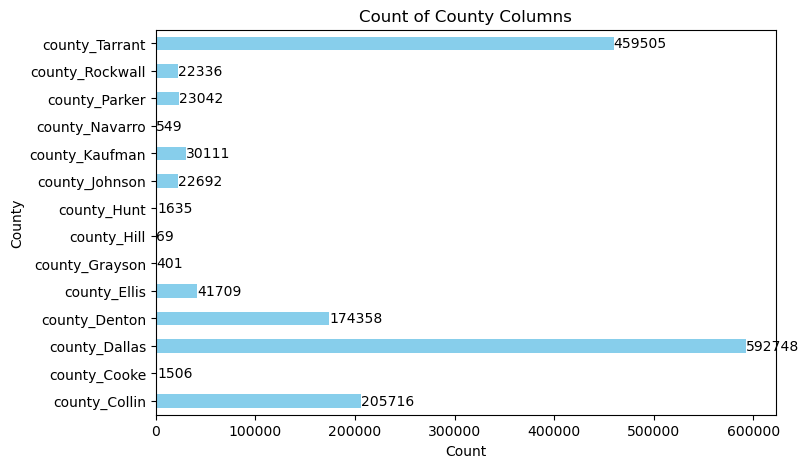

In [47]:
# Filter county and marital status columns from the DataFrame
county_columns = [col for col in df_auto_churn_clean.columns if col.startswith('county_')]

# Plot bar chart for county columns
plt.figure(figsize=(8, 5))
county_counts = df_auto_churn_clean[county_columns].sum()
county_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('County')
plt.title('Count of County Columns')

# Annotate bars in the county chart
for i, count in enumerate(county_counts):
    plt.text(count + 5, i, f'{count}', ha='left', va='center')

plt.show()

In [48]:
# Filter county columns from the DataFrame
county_columns = [col for col in df_auto_churn_clean.columns if col.startswith('county_')]

# Calculate count and percentage for each county column
county_counts_percentage = {}
total_rows = len(df_auto_churn_clean)
for county_col in county_columns:
    count = df_auto_churn_clean[county_col].sum()
    percentage = (count / total_rows) * 100
    county_counts_percentage[county_col] = percentage

# Create a DataFrame from the dictionary
county_counts_df = pd.DataFrame.from_dict(county_counts_percentage, orient='index', columns=['Percentage'])

# Display the DataFrame as a table
print(county_counts_df)

                 Percentage
county_Collin     13.049924
county_Cooke       0.095536
county_Dallas     37.601919
county_Denton     11.060679
county_Ellis       2.645877
county_Grayson     0.025438
county_Hill        0.004377
county_Hunt        0.103719
county_Johnson     1.439503
county_Kaufman     1.910140
county_Navarro     0.034827
county_Parker      1.461706
county_Rockwall    1.416920
county_Tarrant    29.149436


Since county_Hill has the smallest count at 69, we will drop that column. 

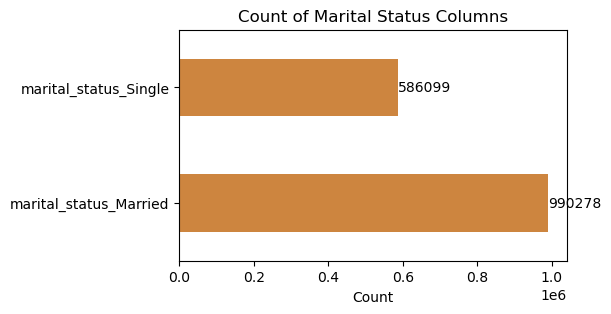

In [49]:
# Filter and plot county columns
plt.figure(figsize=(5, 3))
(df_auto_churn_clean.filter(like='marital_status').sum()
 .plot(kind='barh', color='peru', title='Count of Marital Status Columns'))
plt.xlabel('Count')

# Annotate bars
for i, count in enumerate(df_auto_churn_clean.filter(like='marital_status').sum()):
    plt.text(count + 5, i, f'{count}', ha='left', va='center')

plt.show()

Since there are only two columns for marital_status we will drop the column with the lowest count which is marital_status_Single.

In [50]:
# Dropping the ''county_Hill' and 'marital_status_Single' column from df_auto_churn_clean DataFrame
df_auto_churn_clean.drop(columns=['county_Hill','marital_status_Single'], inplace=True)

Now that we have resolved the issues of multicollinearity with the new columns generated by getting dummies lets see if there is any additional multicollinearity or collinearity across the entire DataFrame by creating a heatmap. 

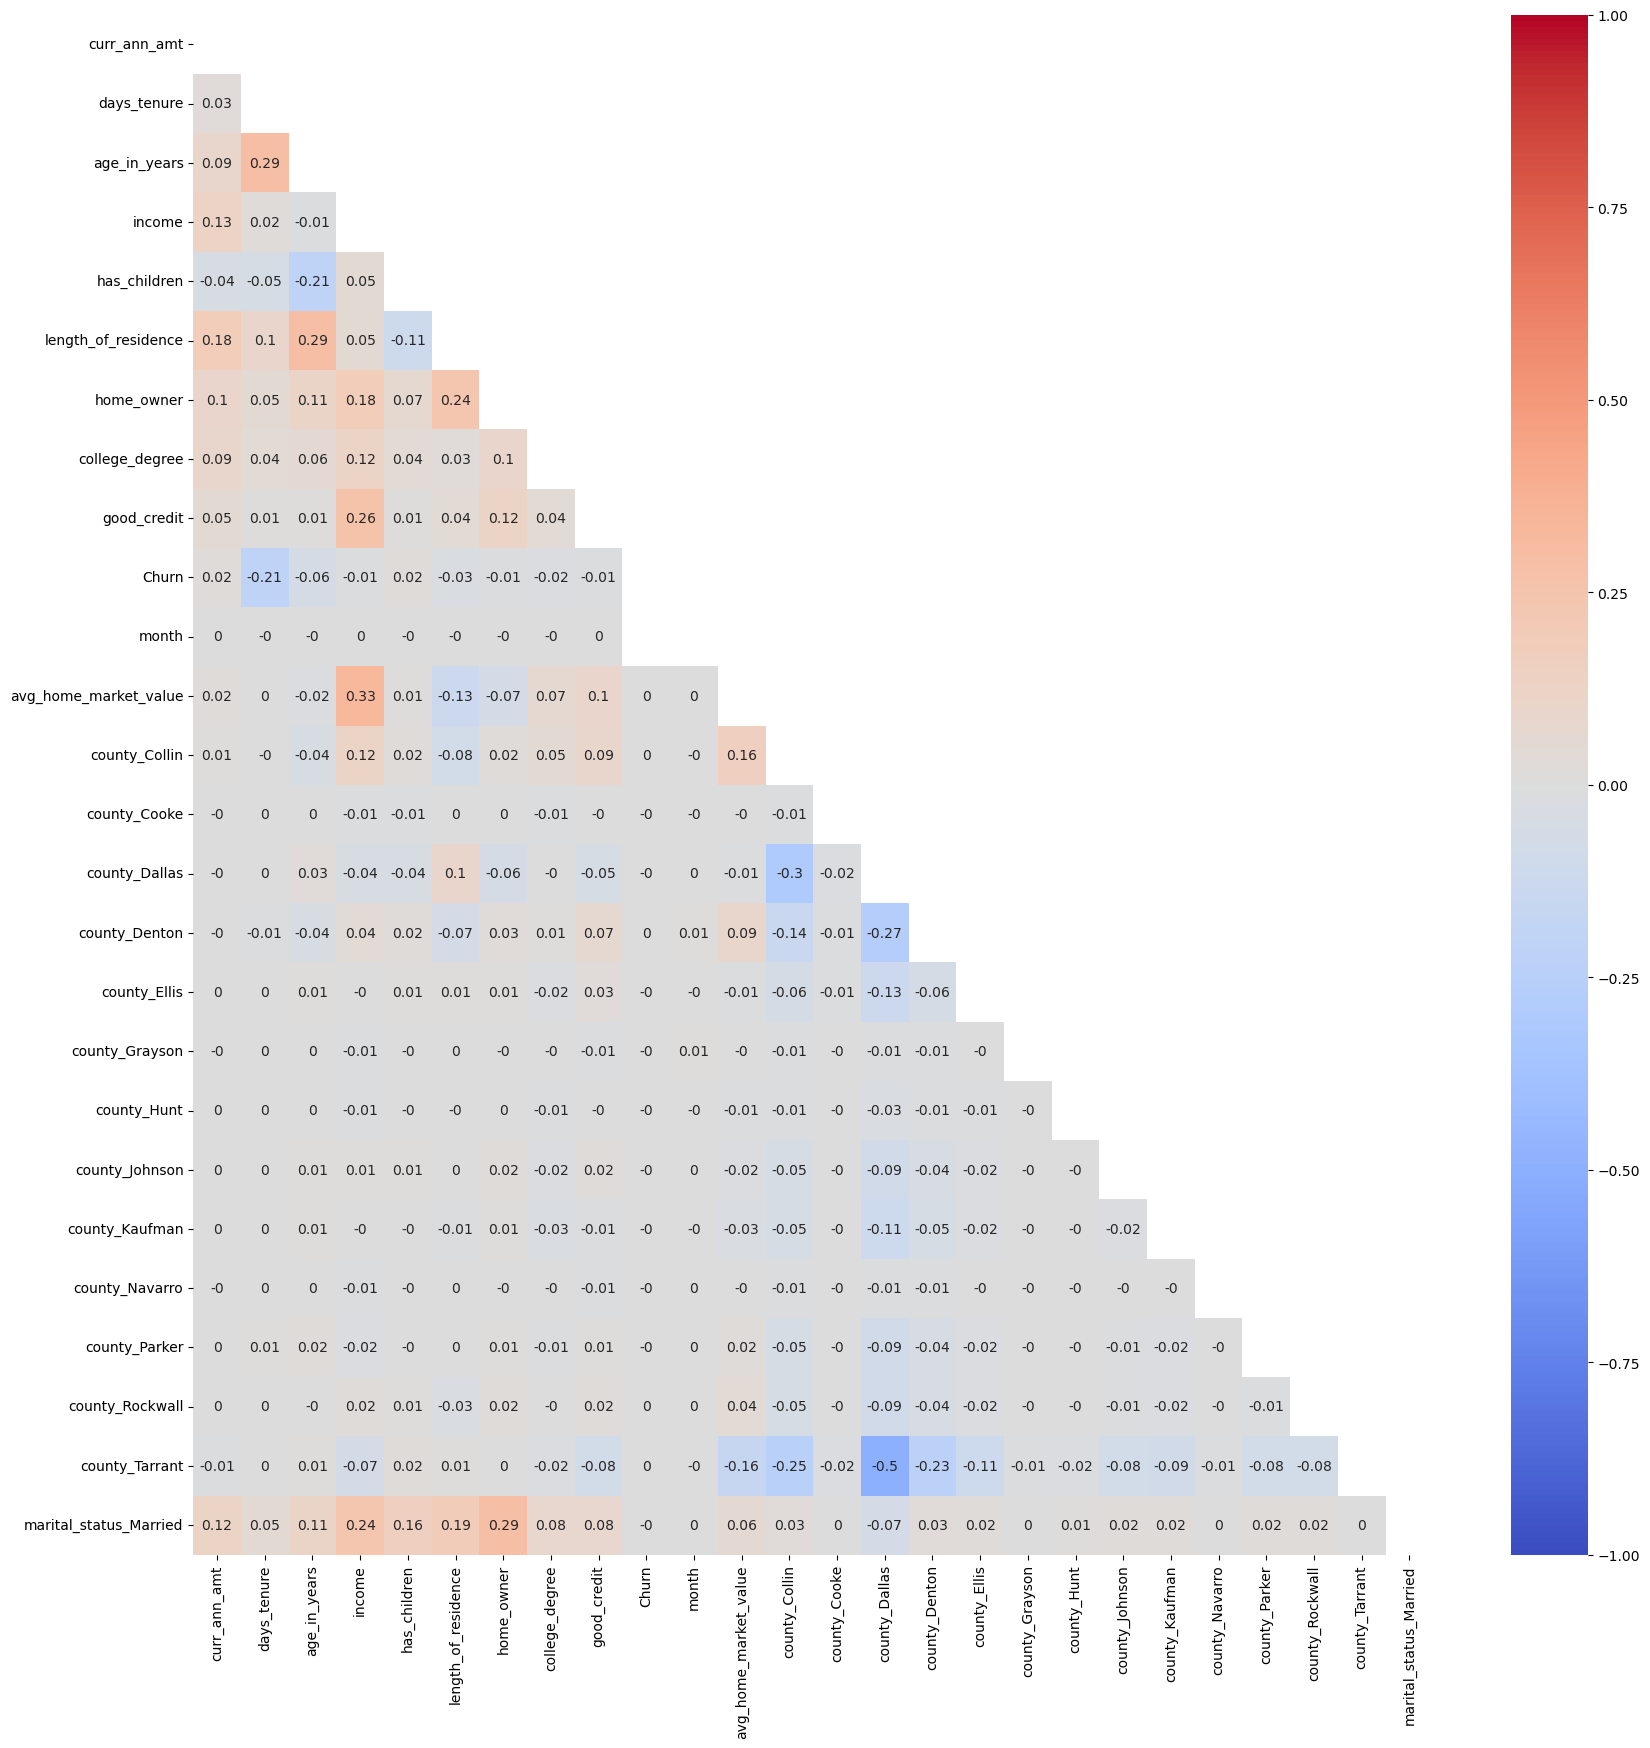

In [51]:
# Create a mask for the upper-triangular part of the correlation matrix
mask = np.triu(df_auto_churn_clean.corr())

# Define your custom colormap with the desired step count
cmap = sns.color_palette("coolwarm", as_cmap=True, n_colors=8)  # Adjust n_colors as needed

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(df_auto_churn_clean.corr().round(2), annot=True, vmax=1, vmin=-1, cmap=cmap, mask=mask, center=0)
plt.show()

Next we will drop the county_Tarrant column due to it having high multicollinearity with the county_Dallas column, but having a lower count than the county_Dallas column.

The rest of the cells in the heatmap make sense. It is expected to see a large amount of 0 & -1. In the case of the county columns, it is because the county_Tarrant and county_Dallas columns make up ~66% of the total county count values. The presence of these two columns flattens the statistical significance of the rest of the county columns. 

In [52]:
# Dropping the 'county_Tarrant' column from df_auto_churn_clean DataFrame
df_auto_churn_clean.drop(columns=['county_Tarrant'], inplace=True)

With the county_Tarrant column dropped, we will plot another heatmap to check any additional high collinearity. 

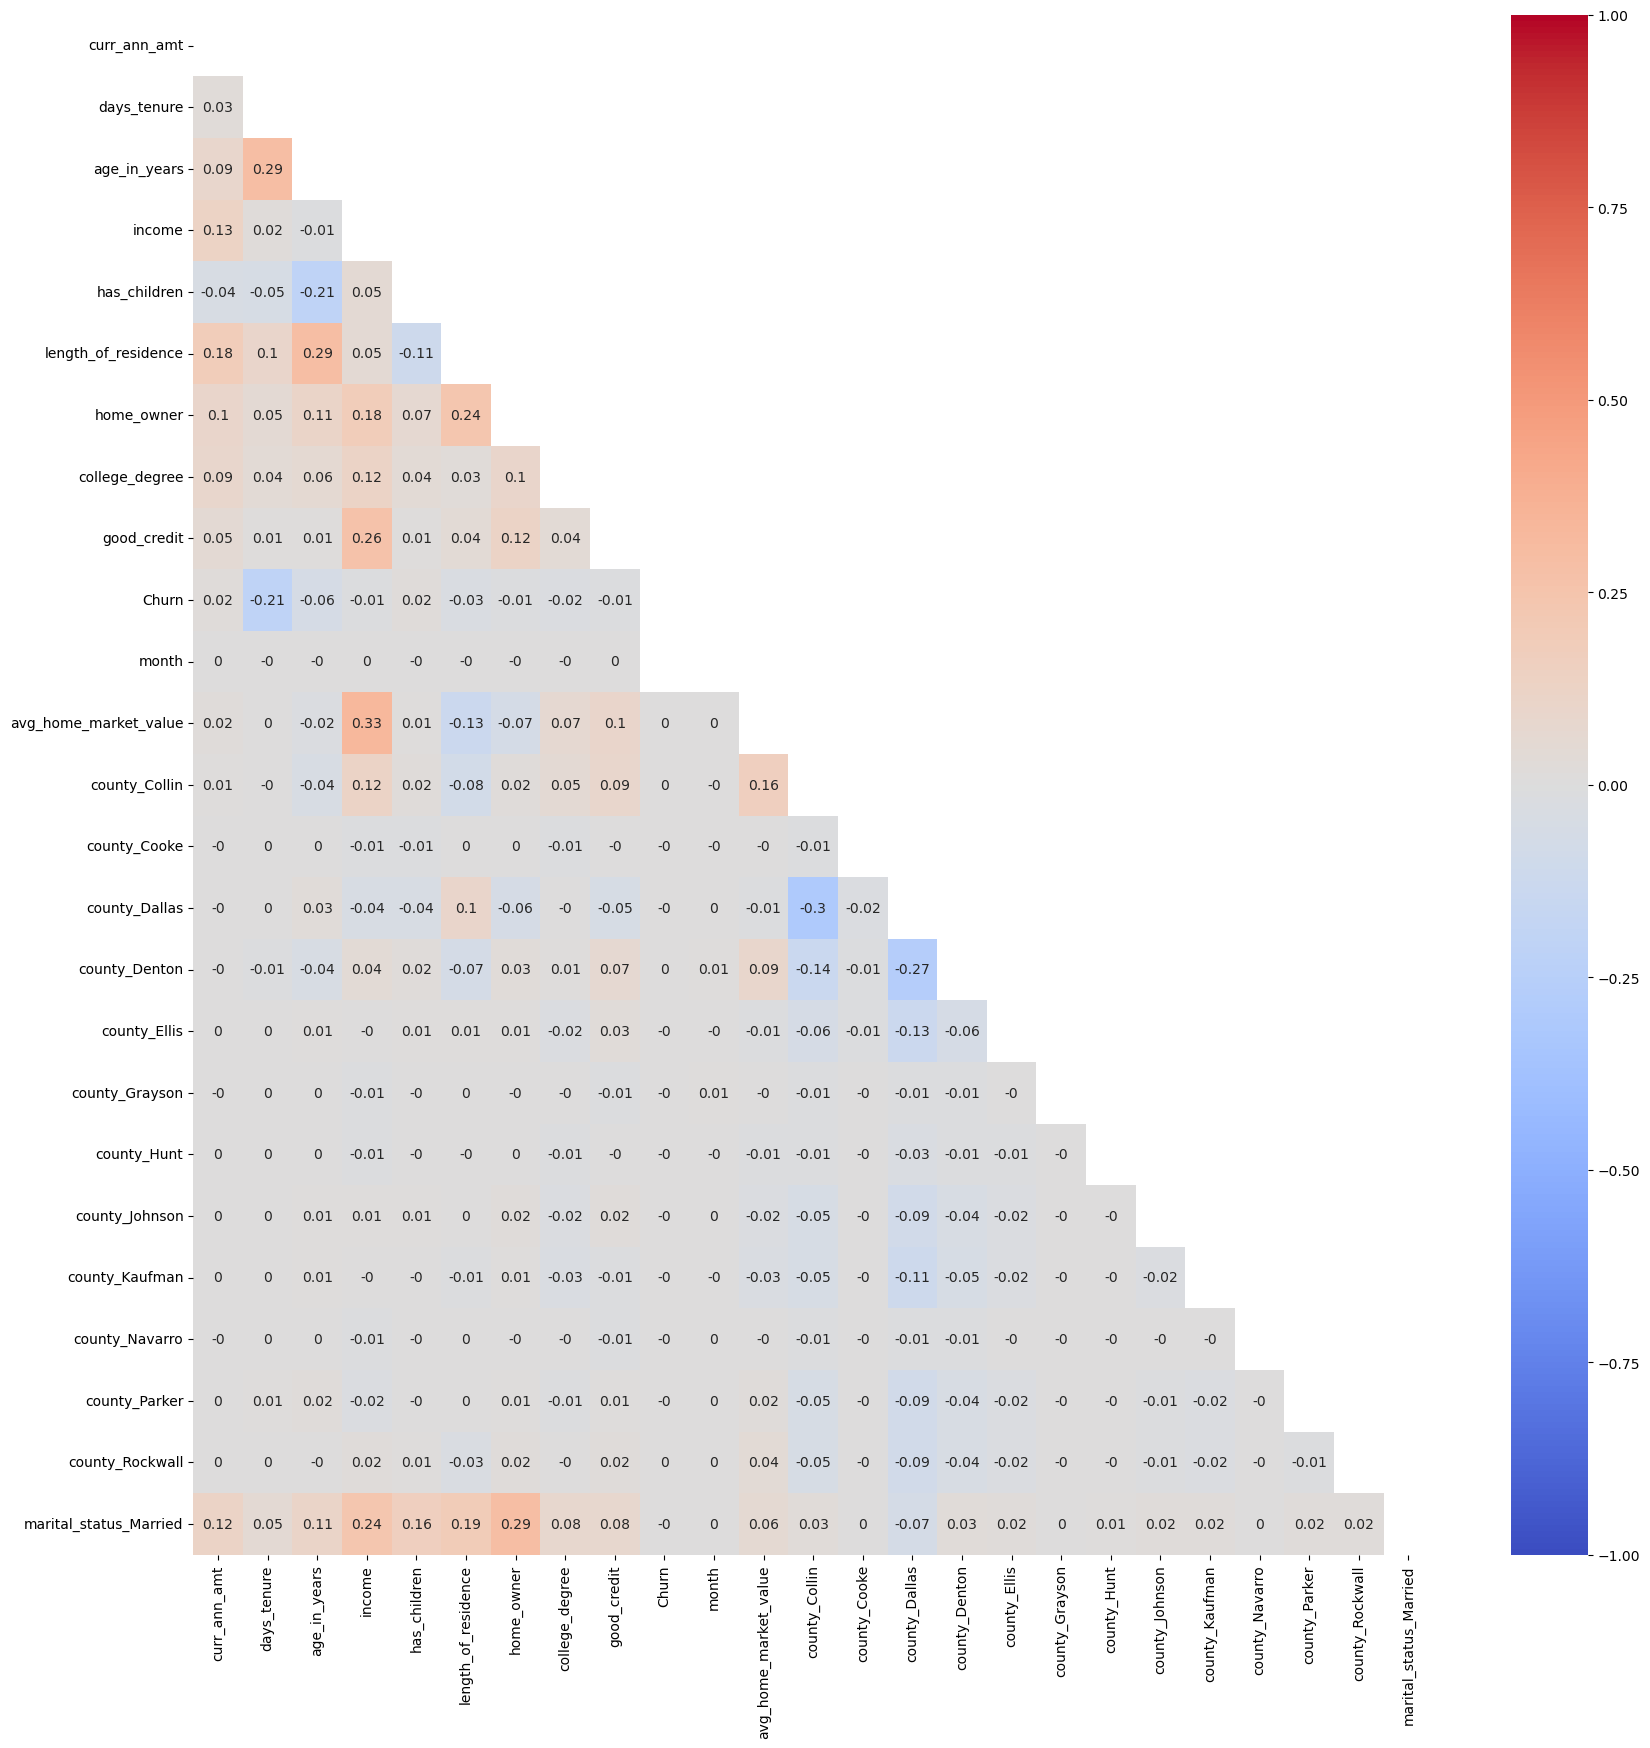

In [53]:
# Create a mask for the upper-triangular part of the correlation matrix
mask = np.triu(df_auto_churn_clean.corr())

# Define your custom colormap with the desired step count
cmap = sns.color_palette("coolwarm", as_cmap=True, n_colors=8)  # Adjust n_colors as needed

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(df_auto_churn_clean.corr().round(2), annot=True, vmax=1, vmin=-1, cmap=cmap, mask=mask, center=0)
plt.show()

There does not appear to be any additional multicollinearity. 

What is most interesting is that most of the column do not have a significant correlation with the Churn column except for the days_tenure column. With a correlation of -0.21, I may need to explore days_tenure as a better measure of customer retention than Churn. 

Next we will plot the count distribution for each column excluding any columns that start with county. Based on the EDA above I will need do some feature engieering and experiment with consolidating all counties with a count of less than 100,000.

When looking at count distrbutions for each column I like to take a 'shot gun,' approached and look at as many sub plots as possible from a high level to better plan and organize my feature engineering. 

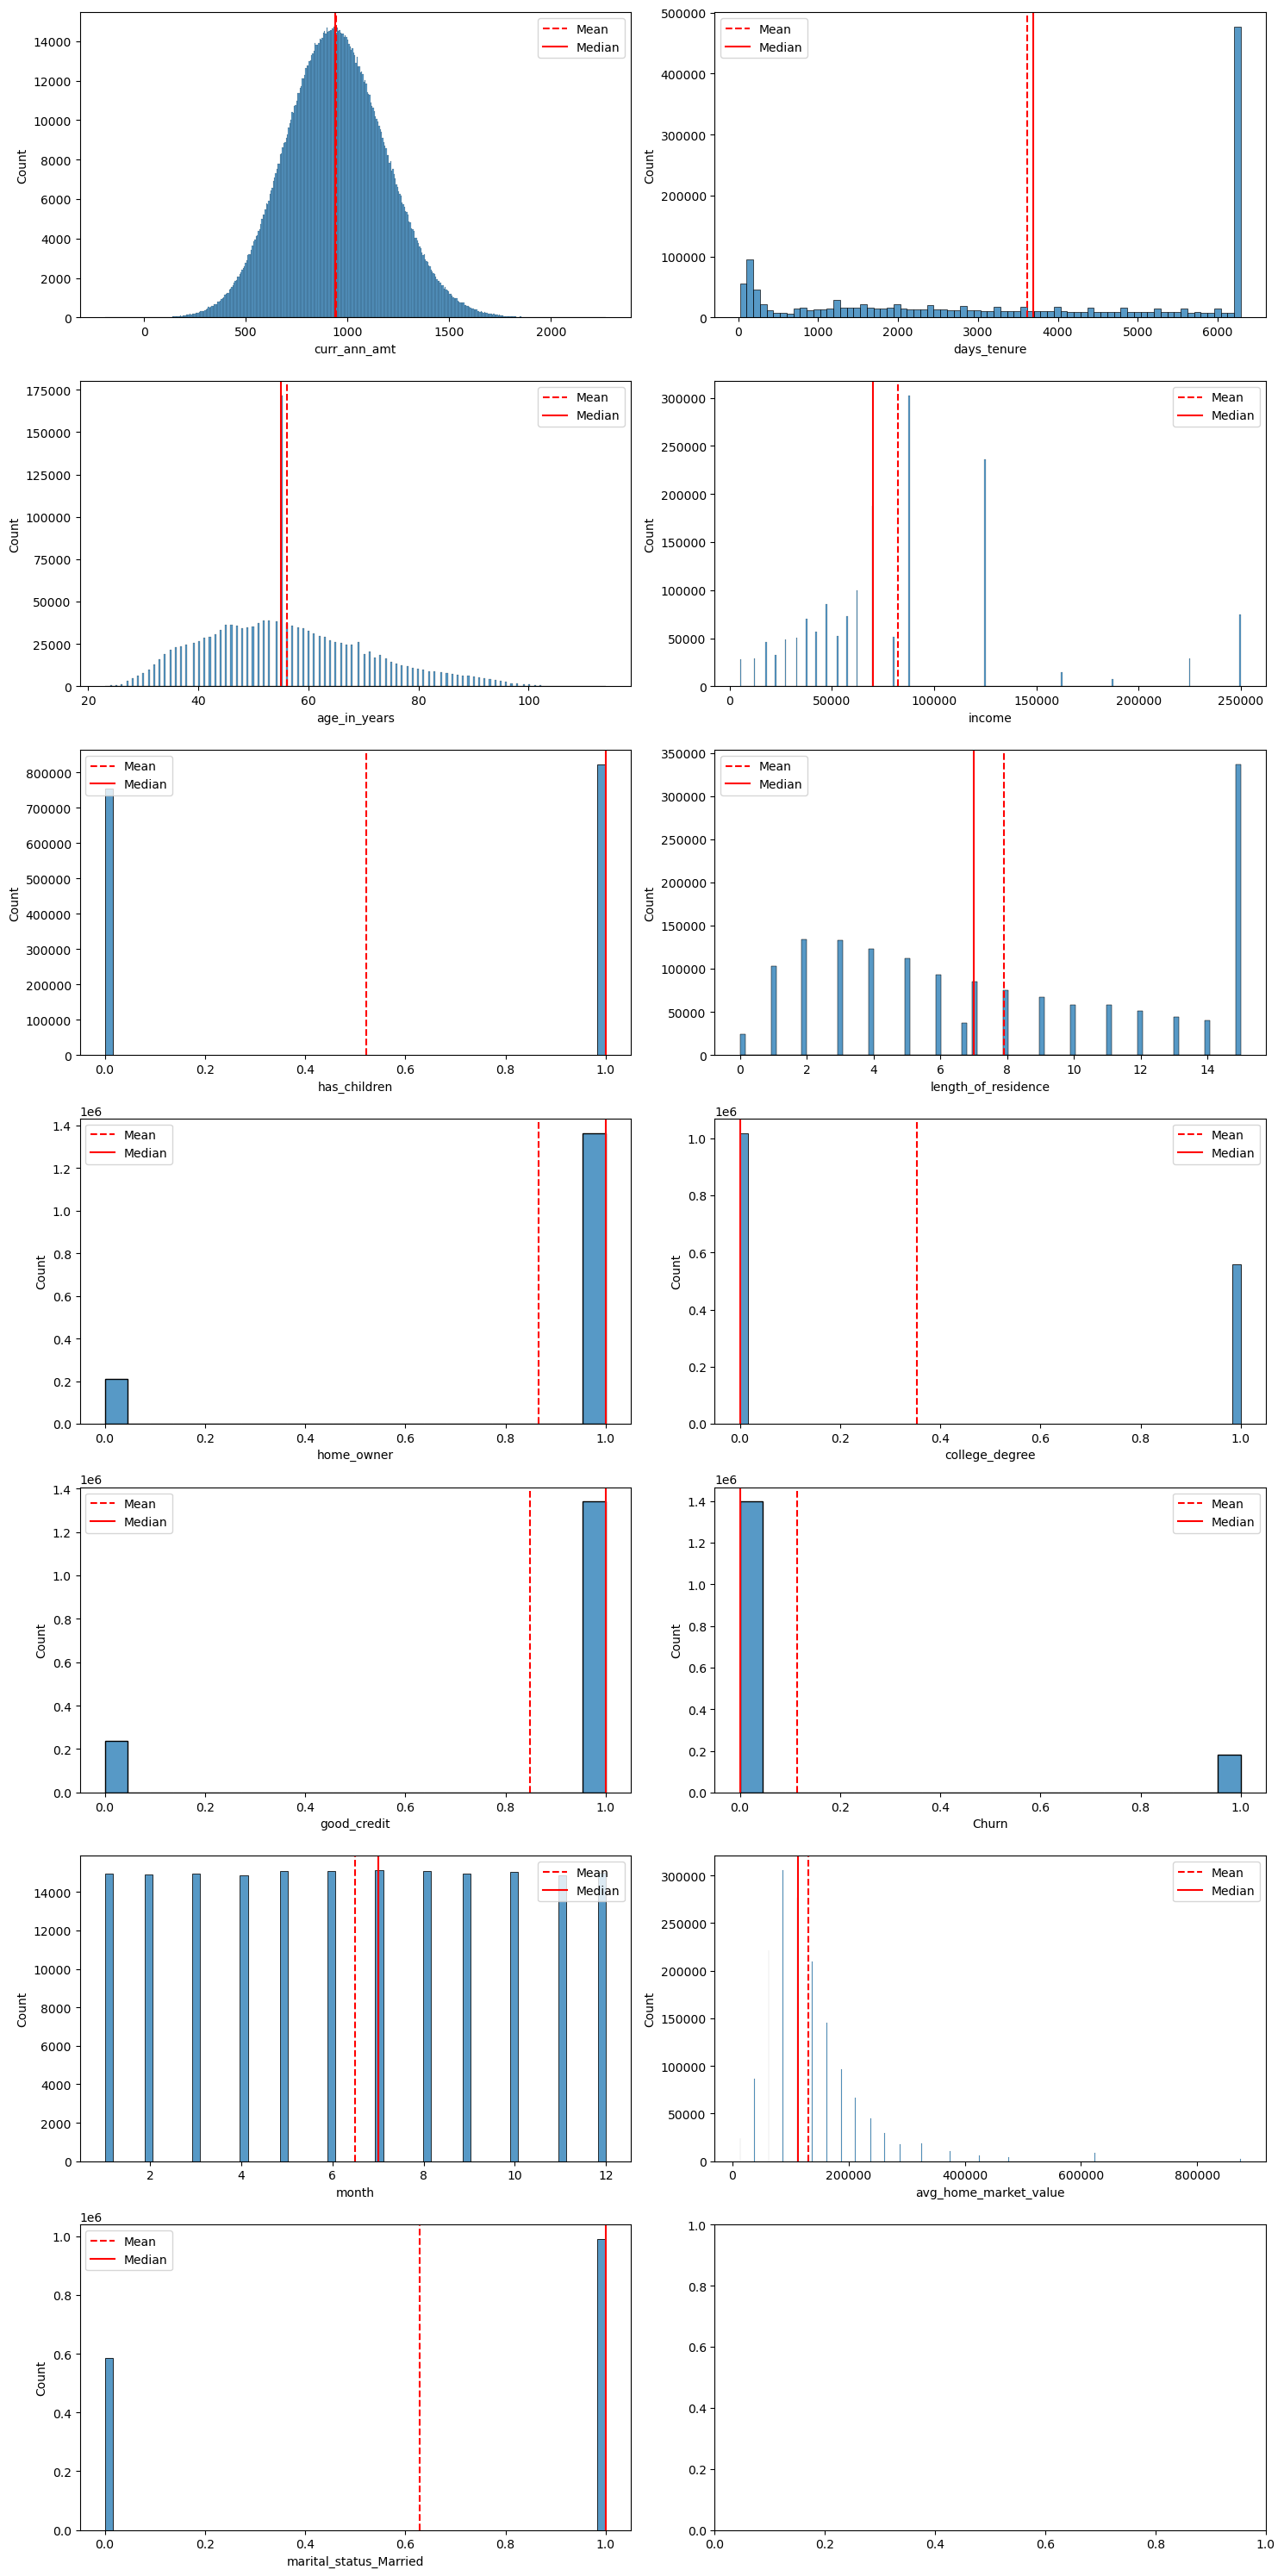

In [54]:
# Set up grid of subplots
plt.subplots(7, 2, figsize=(15, 30))

# Initialize counter
plot_num = 1

# Loop through column names in DataFrame
for col in df_auto_churn_clean.columns:
    if not col.startswith('county_'):
        var = df_auto_churn_clean[col]
        var_mean = var.mean()
        var_median = var.median()

        plt.subplot(7, 2, plot_num)
        sns.histplot(var)
        plt.axvline(var_mean, c='r', label='Mean', linestyle='--')
        plt.axvline(var_median, c='r', label='Median')
        plt.legend()

        plot_num += 1

# Ensure that plots don't overlap
plt.tight_layout()

plt.show()

The findings and areas of interest below are based on the subplots and heatmaps above. 

Findings/Areas of Interest:

    1. curr_ann_amt - The only column with a very clear normal distribution. 
    
    2. days_tenure - Has ne interesting distirbution with the majoriy of days tenure being relatively flat for values between 500 and 600. Seperating this column into three groups(>500; 500-6000; <6000) will be a features to explore. 
    
    3. age_in_year - This column has a somewhat normal distrbution that is skewed right due to the natural life expectancy of humans. 
    
    4. income - Does not appear to have a normal distribution at a high level, but is still a key component of a customers ability to afford their auto insurance premium. 
    
    5. length_of_residence - Has a correlation of 0.29 with age_in_years, which is the same correlation that age_in_years has with days_tenure. (This observation has the the possible branches of a decision tree)
    
    6. avg_home_market_value - Has a strong correlation of 0.33 with income. The strong correlation is expected. 
    
    7. All boolean dtype columns some type of weak correlation with days_tenure.   

I was also able to determine that I will be dropping the month column does not bare any statisitical significance. Although it is perculiar to see the mean be month 7 and median month 6.5, there isn't much statisical value in this column since it is comprised of mostly 1 years worth of data. Thus, the month column will be dropped. There is some thought to also dropping the Churn column as only ~11% of its values are True. However, I may do some exploration of a subset of the overall dataframe based on just looking at all for that ~11% churned. I may go step further and compare it to an analysis of the whole data frame. For now, I will explore the relationship between Churn and predictive(continous dtype) columns. 

In [55]:
# Drop the 'month' column from the DataFrame df_auto_churn_clean in place
df_auto_churn_clean.drop(columns=['month'], inplace=True)

In [56]:
# Save possible predictive column names to list and dependent variable to its own variable
x_options = list(df_auto_churn_clean.select_dtypes('float'))
y = df_auto_churn_clean['Churn']
# visualise target vs float variable
x_options

['curr_ann_amt',
 'days_tenure',
 'income',
 'length_of_residence',
 'avg_home_market_value']

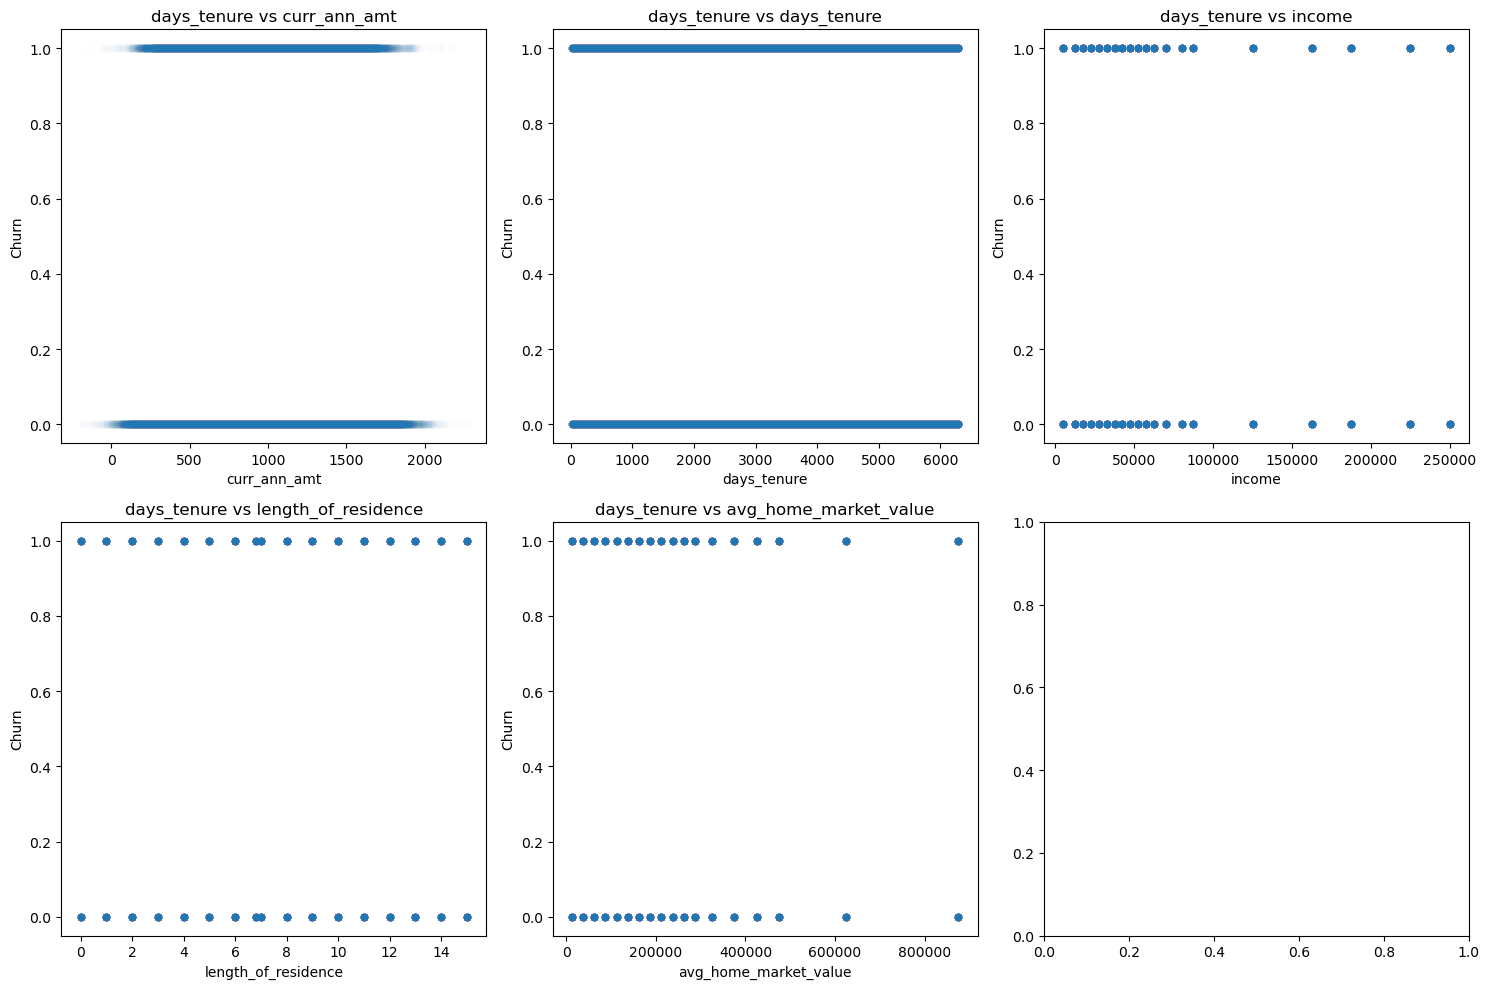

In [57]:
# visualise target vs float variable

plt.subplots(2,3,figsize=(15,10))

plot_num = 1

# loop through x_options
for col in x_options:
    plt.subplot(2,3,plot_num)
    sns.scatterplot(x=df_auto_churn_clean[col], y=y, alpha=0.01) # here alpha affects transparency
    plt.title(f'days_tenure vs {col}')

    plot_num += 1

# ensure that subplots do not overlap
plt.tight_layout()
plt.show()

The relationships and distributions betwen Churn and predictive columns appears to be unclear in the sublots. This requires further investigation in future EDA. 

As mentioned prior, the days_tenure appears to be a better measure of customer retention, so lets explore the relationship between days_tenure and predictive columns. 

In [58]:
# Save possible predictive column names to list and dependent variable to its own variable
x_options = list(df_auto_churn_clean.select_dtypes('float'))
x_options.remove('days_tenure')  # Exclude 'days_tenure' from x_options as it is our target variable. 
y = df_auto_churn_clean['days_tenure']
x_options

['curr_ann_amt', 'income', 'length_of_residence', 'avg_home_market_value']

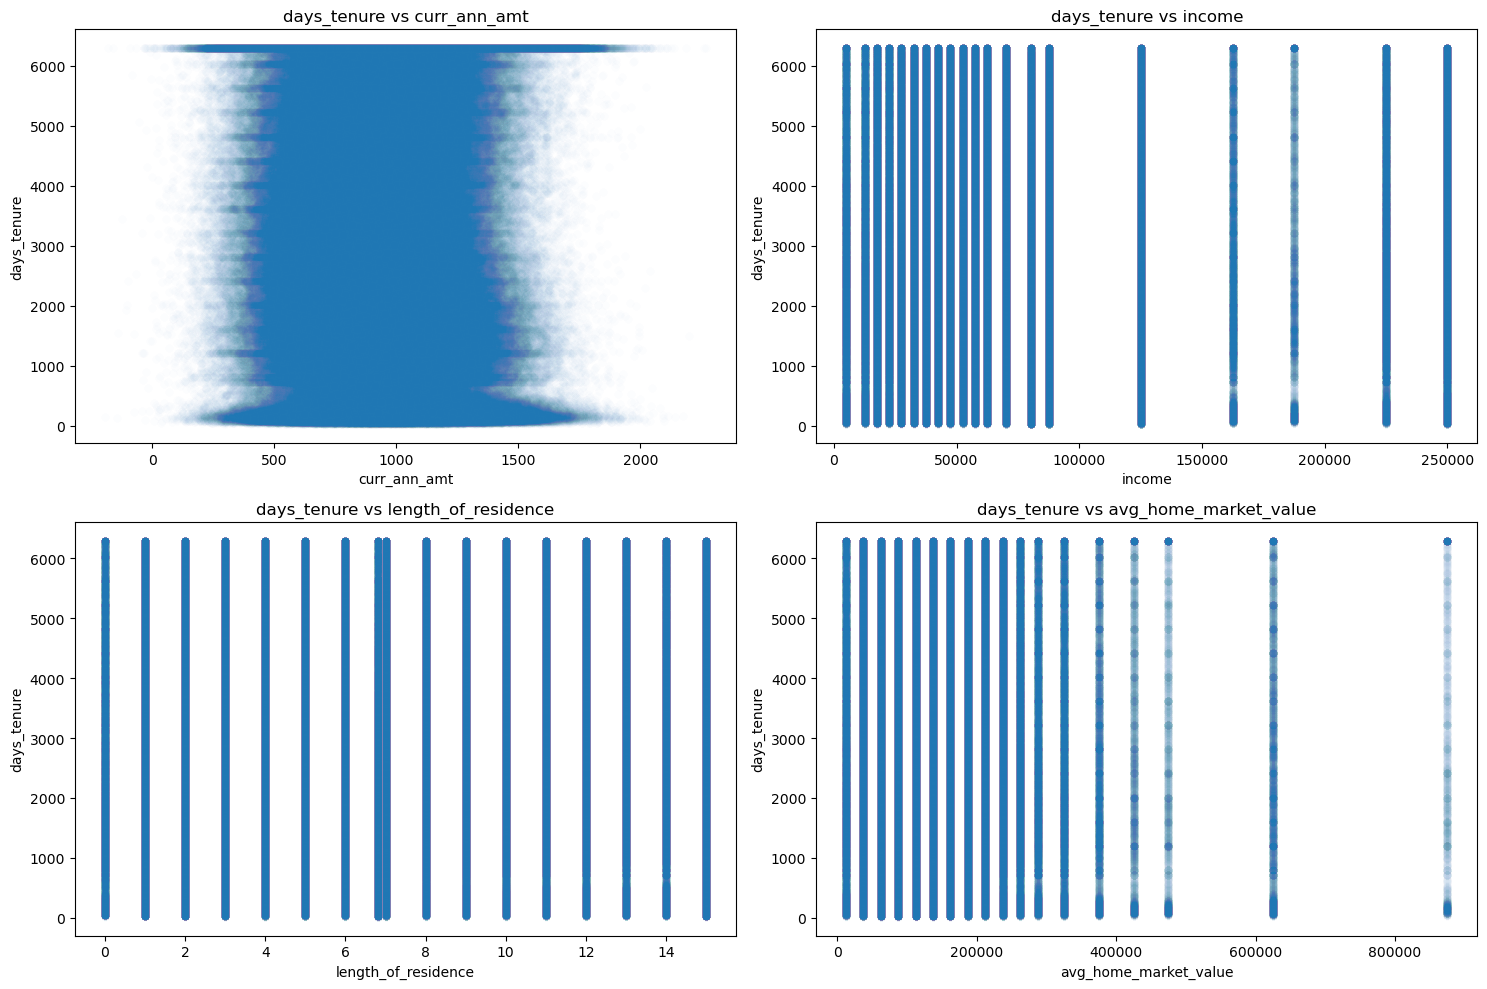

In [59]:
# visualise target vs float variable

plt.subplots(2,2,figsize=(15,10))

plot_num = 1

# loop through x_options
for col in x_options:
    plt.subplot(2,2,plot_num)
    sns.scatterplot(x=df_auto_churn_clean[col], y=y, alpha=0.01) # here alpha affects transparency
    plt.title(f'days_tenure vs {col}')

    plot_num += 1

# ensure that subplots do not overlap
plt.tight_layout()
plt.show()

Findings: 

Note: Due to hardware limitations I had challenges attempting to plot boxplots with this data set. I will may attempt boxplots with smaller subsets of data or with columns that my computer can handle. For now I will work with scatter plots even though it is hard to decern relationships and patterns with them. 

    1. days_tenure x cur_ann_ammt - It is difficult to decern what is happening in the plot. However, the broadest range of cur_ann_ammt can be observed at the early onset of days_tenure and longest days of days_tenure. It almost looks like a vertical double side version of the days_tenure histogram. 
    2. days_tenure x income - Show similar trends as days_tenure x cur_ann_ammt where the majority of plot points are skewed right. 
    3. days_tenure x length_of_residence - Revealed an issue with the quality of the data in the length_of_residence column. 
    4. days_tenure x avg_home_market_value - Appears to be a

 

In [60]:
# Get the unique values in the 'length_of_residence' column of the DataFrame df_auto_churn_clean
df_auto_churn_clean['length_of_residence'].unique()

array([15.   ,  2.   , 10.   ,  6.   ,  4.   ,  8.   , 12.   ,  5.   ,
       11.   ,  9.   ,  7.   ,  1.   ,  3.   , 13.   ,  6.801,  0.   ,
       14.   ])

During feature engineering, I will explore grouping the 6.801 month column with the the 7 month column and 0 month with 1 month. 

For now lets explore the distribution of some of the columns of interest starting with age_in_years.

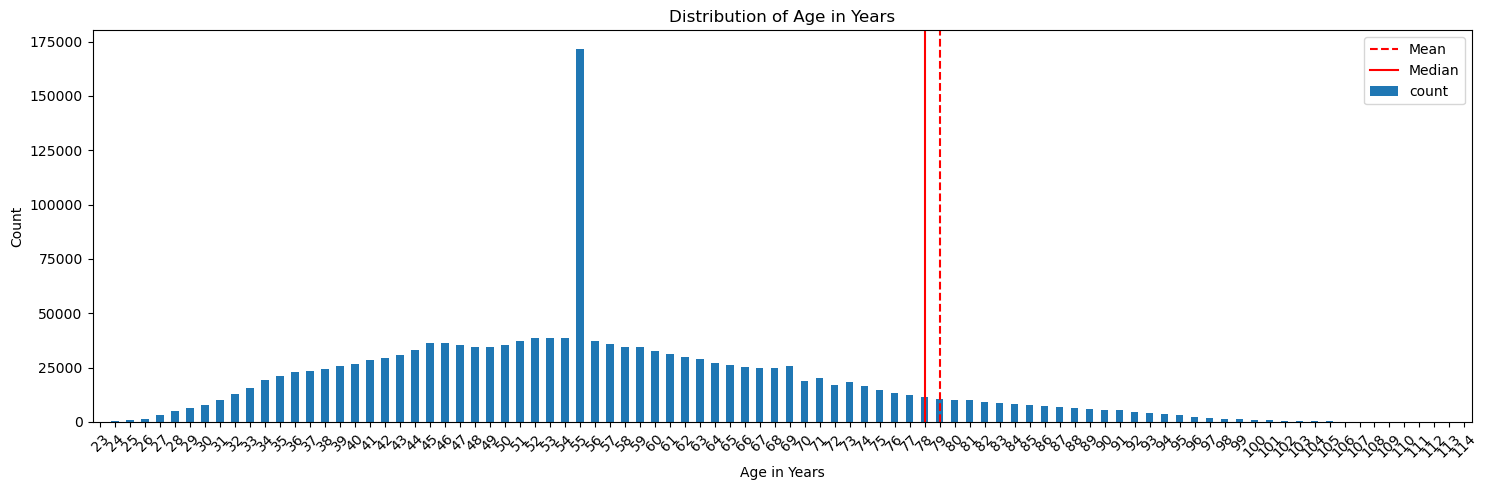

In [61]:
# Set the figure size
plt.figure(figsize=(15, 5))

# Plot the distribution of 'age_in_years' variable as a bar plot with count
ax = df_auto_churn_clean['age_in_years'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Age in Years')
plt.ylabel('Count')
plt.title('Distribution of Age in Years')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Plot vertical lines for mean and median
var_mean = df_auto_churn_clean['age_in_years'].mean()
var_median = df_auto_churn_clean['age_in_years'].median()
plt.axvline(var_mean, c='r', label='Mean', linestyle='--')
plt.axvline(var_median, c='r', label='Median')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Findings: 

    1. Surprisingly, many customers that still retained their auto insurance even passed the age of 100. Some carriers impliment restrictions based on age or underwrite very high premiums of these these individuals as they are high risk for car accidents/claims. 
    2. A large amount of customers are age 55. 
    3. There are a smaller amount of drivers under 35 than expected. This makes this data unreliable for predicting rention of younger customers. 
    4. The presence of individuals over the age of 90 appears to be pulling both the mean and median right. 

Lets explore income. 

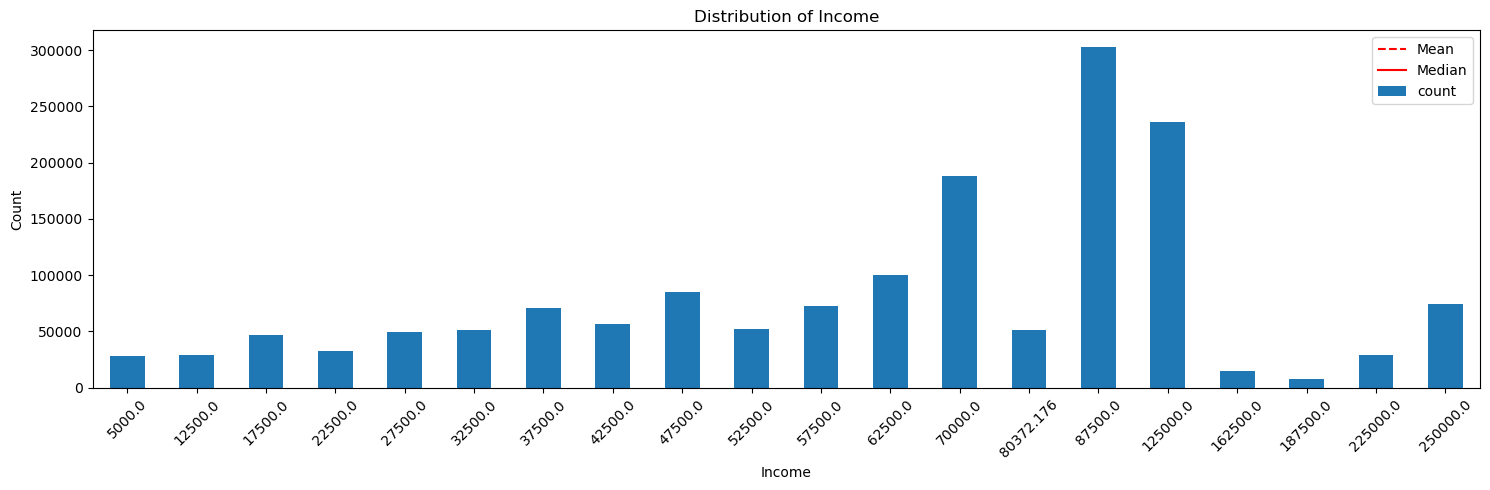

In [62]:
# Set the figure size
plt.figure(figsize=(15, 5))

# Plot the distribution of 'income' variable as a bar plot with count
ax = df_auto_churn_clean['income'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Income')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Plot vertical lines for mean and median
var_mean = df_auto_churn_clean['income'].mean()
var_median = df_auto_churn_clean['income'].median()
plt.axvline(var_mean, c='r', label='Mean', linestyle='--')
plt.axvline(var_median, c='r', label='Median')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [63]:
# Calculate the mean of 'income' column. 
df_auto_churn_clean["income"].mean()

82137.14087640708

In [64]:
# Calculate the median of 'income' column. 
df_auto_churn_clean["income"].median()

70000.0

Findings: 

Note: Median and Mean lines will not plot despite the calculations working just fine above. 

    1. Large portion of customers in this data set make between $70,000 - $87,500. This makes some sense consider most people tend to achieve their heighest income later in life, which is supported by the presence of the large amoutn of 55 year old customers in the data set. The mean and median calculations above support this.
    
    2. For individuals that make $5,000. It is possible they have alternate forms of income (government assistance programs) to support their cost of live as $5,000 is not enough to live on in additonal to paying for auto insurance. 

Next is avg_home_market_value.

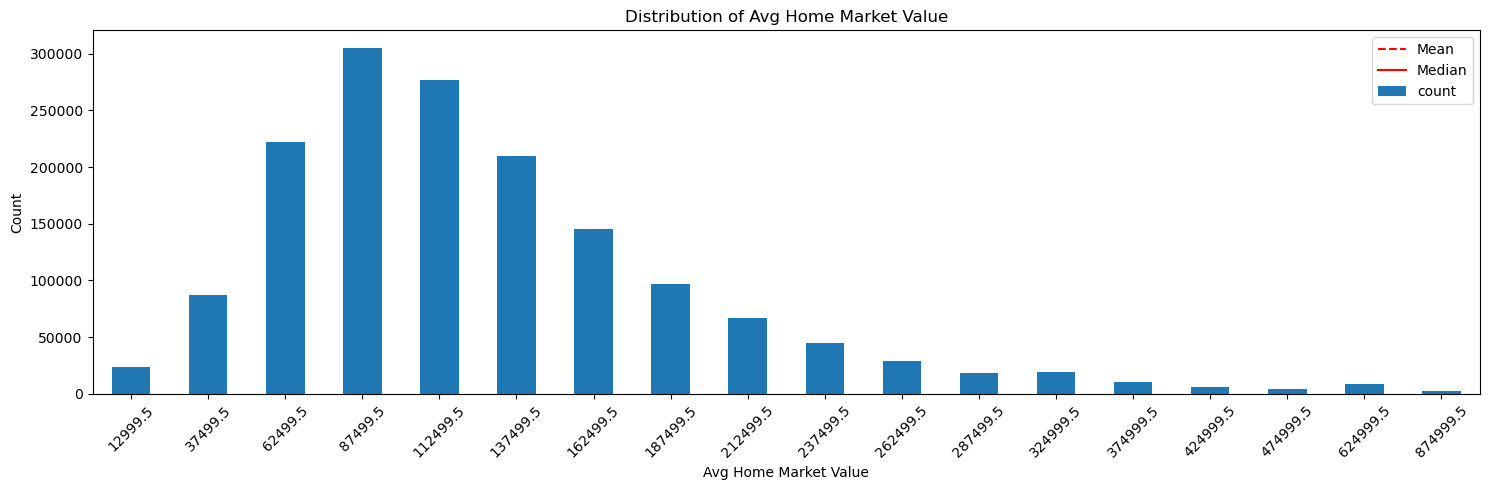

In [65]:
# Set the figure size
plt.figure(figsize=(15, 5))

# Plot the distribution of 'avg_home_market_value' variable as a bar plot with count
ax = df_auto_churn_clean['avg_home_market_value'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Avg Home Market Value')
plt.ylabel('Count')
plt.title('Distribution of Avg Home Market Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Plot vertical lines for mean and median
var_mean = df_auto_churn_clean['avg_home_market_value'].mean()
var_median = df_auto_churn_clean['avg_home_market_value'].median()
plt.axvline(var_mean, c='r', label='Mean', linestyle='--')
plt.axvline(var_median, c='r', label='Median')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [66]:
# Calculate the mean of 'income' column. 
df_auto_churn_clean["avg_home_market_value"].mean()

130918.91997377531

In [67]:
# Calculate the median of 'income' column. 
df_auto_churn_clean["avg_home_market_value"].median()

112499.5

Findings: 

Note: Median and Mean lines will not plot despite the calculations working just fine above. 

    1. Keeping the lower end of income in mind, those low income customer may only be able to rent. However, this dataset only has data for home owners and not renters, which makes for a rather large gap in customer for this DataFrame.
    2. Distribution appears right skewed with a mean of ~$130,918 (~1.59 time more than the mean income = customers are living within their means) and median of ~$112,499((~1.58 time more than the mean income = customers are living within their means). 
    

We explore more of the DataFrame in the Advanced EDA of Sprint 2.

Final sanity check for prelimnary EDA.  

In [68]:
# Calculate the percentage of missing values in each column
100 * (df_auto_churn_clean.isna().sum(axis=0) / df_auto_churn_clean.shape[0])

curr_ann_amt              0.0
days_tenure               0.0
age_in_years              0.0
income                    0.0
has_children              0.0
length_of_residence       0.0
home_owner                0.0
college_degree            0.0
good_credit               0.0
Churn                     0.0
avg_home_market_value     0.0
county_Collin             0.0
county_Cooke              0.0
county_Dallas             0.0
county_Denton             0.0
county_Ellis              0.0
county_Grayson            0.0
county_Hunt               0.0
county_Johnson            0.0
county_Kaufman            0.0
county_Navarro            0.0
county_Parker             0.0
county_Rockwall           0.0
marital_status_Married    0.0
dtype: float64

In [69]:
# Save the cleaned DataFrame df_auto_churn_clean to a CSV file named 'df_auto_retent_clean.csv' in the 'Data' directory
df_auto_churn_clean.to_csv('Data/df_auto_retent_clean.csv')